# 1: CSV Upload

In [1]:
from google.colab import files
uploaded = files.upload()


Saving stores_sales_forecasting.csv to stores_sales_forecasting.csv


# Import Libraries + Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="latin1")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# 3: Basic Information

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()


Shape: (2121, 21)
Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non

# 4: Date Column Convert

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


# 5: Monthly Sales Aggregation

In [5]:
monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Sales']
      .sum()
      .reset_index()
)

monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)
monthly_sales.head()


,Order Date,Sales
0,2014-01,6242.525
1,2014-02,1839.658
2,2014-03,14573.956
3,2014-04,7944.837
4,2014-05,6912.787


# 6: Sales Trend Visualization 📈

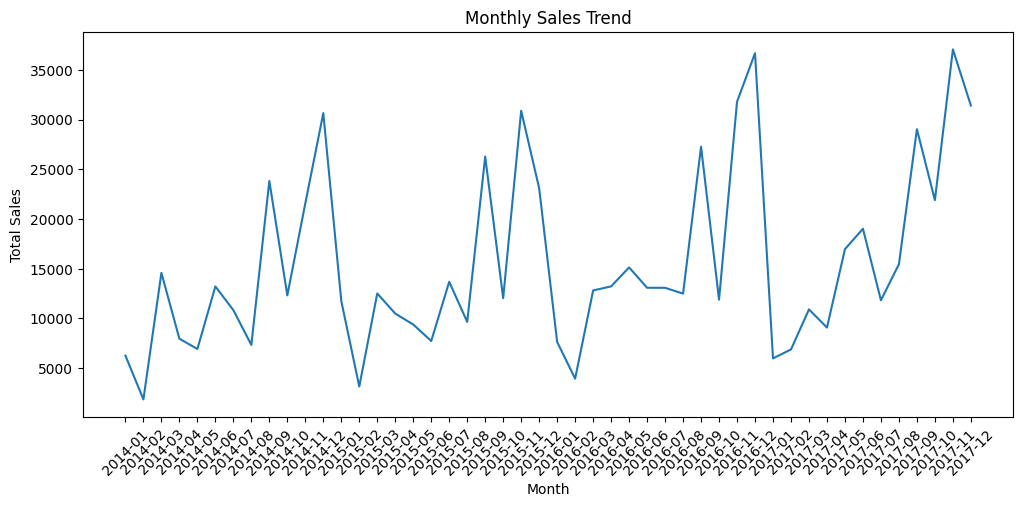

In [6]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


# 7: Prepare Data for ML (Train–Test Split)

In [7]:
from sklearn.model_selection import train_test_split

X = np.arange(len(monthly_sales)).reshape(-1,1)
y = monthly_sales['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


# 8: Train ML Model (Linear Regression)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# 9: Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 6984.515513470838
RMSE: 8486.742683524588


# 10: Actual vs Predicted Graph

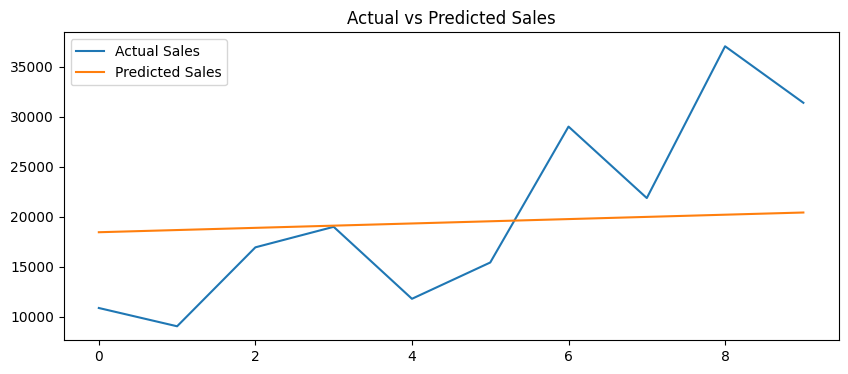

In [13]:
plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()


# 11: Next Month Sales Prediction

In [14]:
next_month_index = np.array([[len(monthly_sales)]])
next_month_prediction = model.predict(next_month_index)

print("Predicted Next Month Sales:", int(next_month_prediction[0]))


Predicted Next Month Sales: 20658


# 12: Final Conclusion

In [15]:
print("""
Conclusion:
- Sales data was cleaned and aggregated monthly
- Sales trend was visualized to understand growth pattern
- Linear Regression model was trained for forecasting
- Model performance evaluated using MAE and RMSE
- The model can be used for basic sales forecasting decisions
""")



Conclusion:
- Sales data was cleaned and aggregated monthly
- Sales trend was visualized to understand growth pattern
- Linear Regression model was trained for forecasting
- Model performance evaluated using MAE and RMSE
- The model can be used for basic sales forecasting decisions

